<h1><center>Standard and Poor's 500 or S&P 500 Stock Data Analysis</center></h1>
<h1><center>DATA 601: Working with Data and Visualization</center></h1>
<h2><center>Group Project Report</center></h2>
<h3><center>Andrii Voitkiv-30199373</center></h3>
<h3><center>Prashant Mittal-30192139</center></h3>
<h3><center>Raj Bhanvadia-30157827</center></h3>

### Introduction 
The most well-known financial benchmark in the world is the Standard and Poor's 500, or S&P 500. This stock market index monitors the performance of 500 significant businesses that are listed on American stock exchanges. 
As terms of finance and investing are broad, we are focusing on exploring equity markets (US stock market) for average retail investors (small investors that usually don't have any impact on market price). This is accomplished by manipulating the data from the S&P 500 and viewing the results of the exercise in form of visualizations. 

Nowadays, it's crucial to manage your finances or invest your money in a way that will help you be ready to combat inflation. Because if your money is not invested appropriately, inflation will reduce the value of your hard-earned dollars. The stock market is thus one option for investing your money. However, stock market investing calls for in-depth market understanding as well as the capital necessary to turn a profit. As of 2022, there are roughly 138 big stock exchanges around the world(List of Stock Markets, 2022). 
We chose to analyze the Standards & Poor's 500 market index. The S&P 500 is a market index that tracks the progress of the top 500 performers across a range of industries. In this project, we'll look at a variety of tactics that a novice retail investor might employ to succeed in the stock market.



### Guiding Questions

The guiding questions that will be addressed using the above datasets in this investigation are:

1. How S&P 500 is structured, what are the components, and how is the final price calculated? What sectors and industries are there? Who are the leaders in each one of them?
<br>The US Stock market is like a huge supermarket with many departments and goods. This question will help us to navigate and eventually construct our basket.

2. How random are markets? Are there fat tails? How the distribution of market returns compares to the normal distribution?
<br>We will confirm that market returns does follow normal distribution and can use this as a risk management tool, i.e. volatility targeting. 

3. Are there any seasonal patterns in the stock market?
<br>We will prove or disprove such well-known seasonalities as the Santa Claus Rally, Sell in May And Go Away, etc.

4. Are there any momentum effects? Does past performance determine future ones? 
<br>Momentum is a well-known phenomenon in the stock market. Simply put, what goes up will continue going up and vice versa or the winners keep winning.

- These questions will be important in observing the behaviour of S&P 500 stock market index in market over the years and will help us identify seasonalities in the market if any, randomness in the market, momentum effects etc. 
- This will help us define tactics that a novice retail investor might be able to exploit to book some profits in the market without the substantial capital or using all the prediction algorithms that this big investing firm uses.

#### **Below is the list of libraries used for Data Wrangling and Data Visualization Tasks:**

In [75]:
#Important Libraries:

import pandas as pd
import numpy as np
import datetime
import math
import scipy.stats as stats
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from ipywidgets import interact


#defining figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4] # default size
plt.rcParams['figure.dpi'] = 150 #  increase the default pixel density used for matplotlib plots

### Tools and Functions

To help us answer our guiding questions and do the relevant visualizations we need to calculate the following things and add few columns based on our requirements:

1.   Most of our analysis revolves around stock market returns therfore the first step in our analysis was to calculate returns therefore we created the function for the same. Returns of the S&P 500 index which can be calculated by using the below formula. 

> *(Ending Price - Strating Price)/(Ending Price) * 100*

2.  Now inorder to get the cummilative returns over the period of time we will use the cumsum function on returns.

3. last_day_of_month() function is used to to get the the last day for every month from January until December, this will be used for the further calculations for the dates.

4. By taking a glance at out datasets and our requirements we needed to format the dates in certain way so that we can create time frames for our analysis. Therefore we first splitted the date which was in "yyyy-mm-dd" format and created three new columns for Year, Month, Day. Now to analyze the seasonality effects on market we had to add few more columns to our datasets like Day Name, Month Name, Day of the week, End of the month and many more.

In [2]:
#Functions Required:

def calc_returns(df, period):
    df['returns'] = np.log(df.close) - np.log(df.close.shift(period)) 
    df['cum_returns'] = df['returns'].cumsum()

def calc_std(df):
    df['std'] = df['close'].rolling(window=50).std()

def last_day_of_month(date):
    if date.month == 12:
        return date.replace(day=31)
    return date.replace(month=date.month+1, day=1) - datetime.timedelta(days=1)
    
def add_date_columns(df):
    df['year'] = df.index.map(lambda row: row.year)
    df['month'] = df.index.map(lambda row: row.month)
    df['dom'] = df.index.map(lambda row: row.day)
    df['day_name'] = df.index.map(lambda row: row.strftime("%A"))
    df['month_name'] = df.index.map(lambda row: row.strftime("%B"))
    df['dow'] = df.index.map(lambda row: row.weekday())
    df['eom'] = df.index.map(lambda row: last_day_of_month(row))
    df['days_to_eom'] = (df.index - df['eom']) / np.timedelta64(1,'D')
    df['wom'] = pd.to_numeric(df.index.day/7)
    df['wom'] = df['wom'].apply(lambda x: math.ceil(x))

In [3]:
def bootstrap(df, df_effect):
    boot_sim = []
    nsim = 1000
    N = len(df)
    n = len(df_effect)
    for i in range(nsim):
        df_mean = np.mean(df['returns'].sample(N, replace = True))
        df_effect_mean = np.mean(df_effect['returns'].sample(n, replace = True))
        diff = df_effect_mean - df_mean
        boot_sim.append(diff)
    
    return np.array(boot_sim)

def conf_interval(array):
    lb = array.mean() - 1.96 * array.std()
    ub = array.mean() + 1.96 * array.std()
    return lb, ub

In [4]:
#Dataframes:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

### Dataset Source
- It is about S&P 500 stock market data retrieved from Kaggle and collected from FRED and yfinance.

- It’s a daily updated dataset started from December 2009 but we have extracted it till end of September 2022. 

- There are 3 tables(Companies, Index, and Stocks) in a structured table format having 493 unique rows and 26 columns. Moreover, it has categorical columns including decimal, string, integer, and others. Here is the source: Remote source: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks.

- It’s an open source data available on Kaggle contributed by Larxel and under the license of CC0: Public Domain.

### Load and Read Data

In [5]:
# Read the S&P index data
df_index = pd.read_csv('sp500_index.csv')
display(df_index.head(5))
#display(df_index.info())

Date   S&P500
0  2012-09-10  1429.08
1  2012-09-11  1433.56
2  2012-09-12  1436.56
3  2012-09-13  1459.99
4  2012-09-14  1465.77

In [15]:
# Read the S&P stocks data
df_stocks_prices = pd.read_csv('sp500_stocks.csv')
display(df_stocks_prices.head(2))
#display(df_stocks_prices.info())

Date Symbol  Adj Close      Close       High        Low       Open  \
0  2009-12-31    MMM        NaN        NaN        NaN        NaN        NaN   
1  2010-01-04    MMM  59.318886  83.019997  83.449997  82.669998  83.089996   

      Volume  
0        NaN  
1  3043700.0

In [8]:
# Read the S&P companies data
df_companies = pd.read_csv('sp500_companies.csv')
display(df_companies.head(2))
#display(df_companies.info())

Exchange Symbol              Shortname               Longname      Sector  \
0      NMS   AAPL             Apple Inc.             Apple Inc.  Technology   
1      NMS   MSFT  Microsoft Corporation  Microsoft Corporation  Technology   

                  Industry  Currentprice      Marketcap        Ebitda  \
0     Consumer Electronics        157.37  2581875130368  1.295570e+11   
1  Software—Infrastructure        264.46  1985560313856  9.798300e+10   

   Revenuegrowth       City State        Country  Fulltimeemployees  \
0          0.019  Cupertino    CA  United States           154000.0   
1          0.124    Redmond    WA  United States           221000.0   

                                 Longbusinesssummary    Weight  
0  Apple Inc. designs, manufactures, and markets ...  0.080568  
1  Microsoft Corporation develops, licenses, and ...  0.061960

### Cleaning Dataset

- The first task while cleaning the dataset was to deal with the null values. Now occurrence of null values in some of the columns was not an issue because that didn't have any impact on analysis for eg: Fulltimeemployees, State, etc. While in other places it was important to deal with the null values by either dropping the null values or filling in the missing information with appropriate values. For example, in the company dataset we were missing values for Sector, Industry, and Currentprice for one of the companies in the S&P 500(Lowe's Companies, Inc.) but we need this data for a few of our visualizations and need a current price of the compaines to calculate the returns.

- Next the date values which we got from the dataset are in "yyyy-mm-dd" format and to create the time frames we had to separate those into the year, month, and day respectively. Along with this we also had to add a few columns like eom(end of the month), dow(day of the week), wom(Week of the month), days_to_eom(days to end of the month), day name, and month name.

- Next step in the data wrangling process was to calculate the returns which will be done using the calc_returns function we defined at the start. This is an integral part of our project as this acts as the foundation for our further analysis.

- We had to restructure our stocks dataset by using the pivot table function of the pandas data frame. This made it easier to read and retrieve the data from the dataset.

- Based on the return columns we calculated the cumulative returns for our further exploration of this dataset.



In [9]:
#finding null values for industry attribute
df_companies[df_companies['Industry'].isnull()]

Exchange Symbol               Shortname                Longname Sector  \
50      NYQ    LOW  Lowe's Companies, Inc.  Lowe's Companies, Inc.    NaN   

   Industry  Currentprice     Marketcap  Ebitda  Revenuegrowth City State  \
50      NaN           NaN  138556063744     NaN            NaN  NaN   NaN   

   Country  Fulltimeemployees Longbusinesssummary    Weight  
50     NaN                NaN                 NaN  0.004324

In [10]:
# fill nan
# citations https://finviz.com/quote.ashx?t=LOW&p=d
df_companies.loc[df_companies['Symbol']=='LOW', 'Sector'] = 'Consumer Cyclical'
df_companies.loc[df_companies['Symbol']=='LOW', 'Industry'] = 'Home Improvement Retail'
df_companies.loc[df_companies['Symbol']=='LOW', 'Country'] = 'United States'

#### Add Date Attributes (S&P 500)

In [11]:
# Set datetime index
df_index['Date'] = pd.to_datetime(df_index['Date'])
df_index.set_index('Date', inplace=True)

In [12]:
#adding date months columns using function to index data frame
add_date_columns(df_index)
df_index.head(2)

S&P500  year  month  dom day_name month_name  dow        eom  \
Date                                                                        
2012-09-10  1429.08  2012      9   10   Monday  September    0 2012-09-30   
2012-09-11  1433.56  2012      9   11  Tuesday  September    1 2012-09-30   

            days_to_eom  wom  
Date                          
2012-09-10        -20.0    2  
2012-09-11        -19.0    2

### Calculate Returns (S&P 500)

In [13]:
#calculating returns based on S&P500 values by using function
df_index.rename({'S&P500': 'close'}, axis=1, inplace=True)
calc_returns(df_index, period=1)
df_index.head(3)
df_index.to_csv('df_index.csv', sep=',', encoding='utf-8')

### Stocks Dataset Transformations

- Now that we have completed the Data Wrangling part of our analysis process. We move on to the next step which is to visualize our data through some basic plots. 
- The first thing we would plot is the performance of the S&P index over the years. From the graph, we can clearly see that there's a gradual rise in returns for the S&P 500 except for a few downwards spikes that is because of the global events such as covid 19 pandemic.

In [16]:
# Set datetime index
df_stocks_prices['Date'] = pd.to_datetime(df_stocks['Date'])
df_stocks_prices.set_index('Date', inplace=True)

df_stocks = df_stocks_prices.pivot(columns='Symbol', values='Adj Close')
display(df_stocks.head(2))

Symbol              A       AAL        AAP      AAPL  ABBV        ABC  ABMD  \
Date                                                                          
2009-12-31        NaN       NaN        NaN       NaN   NaN        NaN   NaN   
2010-01-04  20.434929  4.496876  38.432693  6.572423   NaN  22.101795  8.74   

Symbol            ABT        ACN   ADBE  ...       WYNN        XEL        XOM  \
Date                                     ...                                    
2009-12-31        NaN        NaN    NaN  ...        NaN        NaN        NaN   
2010-01-04  19.778837  32.970871  37.09  ...  41.963718  13.932555  43.185623   

Symbol           XRAY  XYL        YUM        ZBH   ZBRA       ZION  ZTS  
Date                                                                     
2009-12-31        NaN  NaN        NaN        NaN    NaN        NaN  NaN  
2010-01-04  32.782581  NaN  19.900911  53.282867  28.67  11.580979  NaN  

[2 rows x 503 columns]

### Time Series Visualization

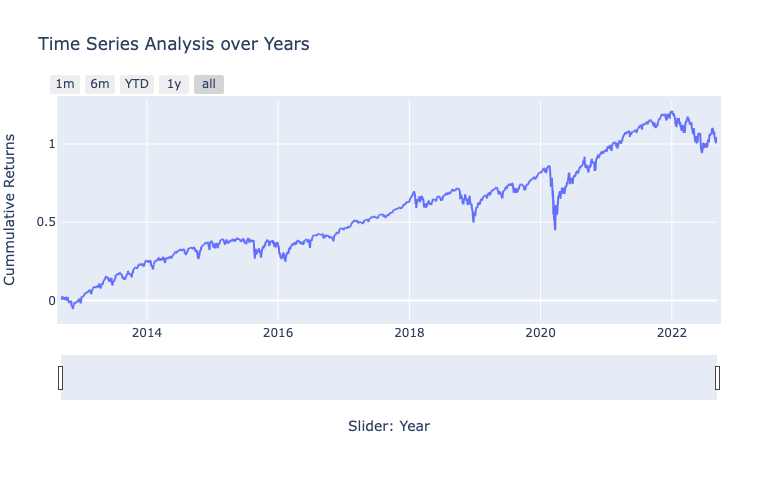

In [17]:
#reseting the date index for some visualizations
df_index_temp1 = df_index
df_index_temp1 = df_index_temp1.reset_index()

#time series plot for returns S&P 500
figure1 = px.line(df_index_temp1,x = df_index_temp1.Date , y = df_index_temp1.cum_returns, 
                 title = "Time Series Analysis over Years")

# Add range slider
figure1.update_layout(  autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
        xaxis_title="Slider: Year",
    yaxis_title="Cummulative Returns",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
) 

figure1.show()

#### Inference:
- Time series of returns over the period of S&P 500 dataset.

- This helps with both representing the overall index performance and predicting how it will move over time. Both people and the economy as a whole may be significantly impacted by the stock market. The risk of loss can be decreased and profit can be increased by accurately predicting stock trends.

- S&P 500 index has shown upward trend over the year except for few hiccups this is because of various global events like covid pandemic, war and many more and this impacts the index performance over the time.

- This is the collective trend for the whole S&P index and this does not correspond to how the individual stocks in the S&P index would perform over the years.


### Candlestick Chart

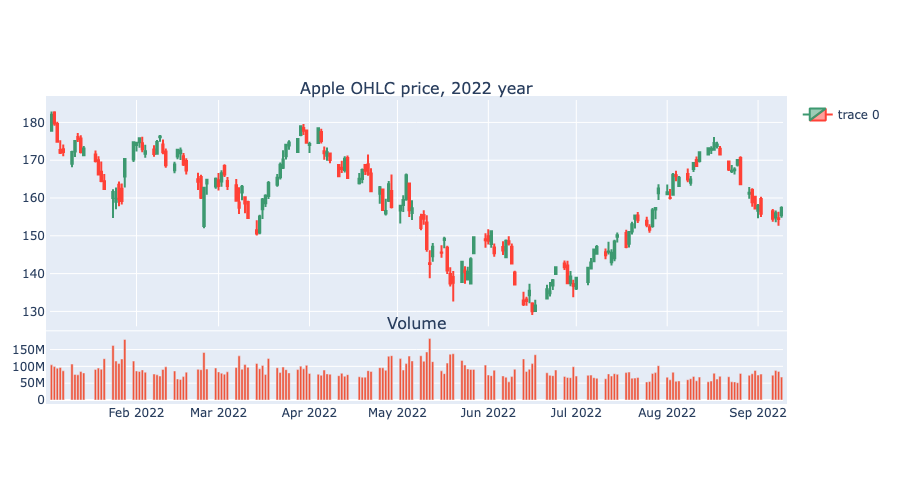

In [24]:
#candle chart for AAPL stock 2022 year
df_aapl = df_stocks_prices.loc[df_stocks_prices['Symbol']=='AAPL']
df_aapl_2022 = df_aapl.loc['2022-01-01':,] 


# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, subplot_titles=('Apple OHLC price, 2022 year', 'Volume'), 
               row_width=[0.2, 0.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=df_aapl_2022.index,
                             open=df_aapl_2022['Open'], 
                             high=df_aapl_2022['High'],
                             low=df_aapl_2022['Low'],
                             close=df_aapl_2022['Adj Close']), row=1, col=1)

# Bar trace for volumes on 2nd row without legend
fig.add_trace(go.Bar(x=df_aapl_2022.index, y=df_aapl_2022['Volume'], showlegend=False), row=2, col=1)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
)
fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

#### Inference:
- Candlestick chart is a common way to present financial data in financial markets. 
- The one advantage, it gives more information on price as we observe open, high, low, close price for a day. 
- Another advantage, the overnight gaps can be seen while line plots simply connect all prices and create this illusion that price data is continuous.
- Volume helps to understand when the interest of investors is high. Regarding Apple stock, we can observe the higher volume in May while the price was trending down.  

#### Calculate Cummulative Returns for Stocks 

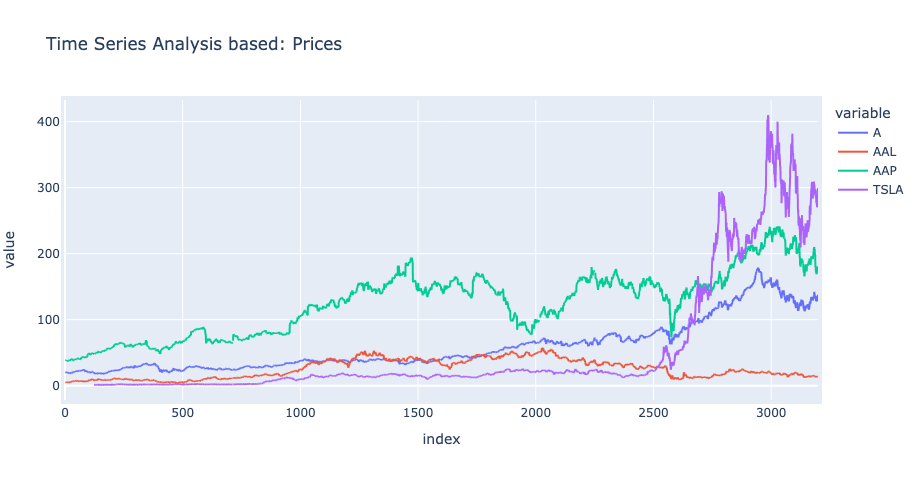

In [27]:
# Basic plotting
# What we don't want to do
df_temp = df_stocks[['A', 'AAL', 'AAP', 'TSLA']]
df_temp = df_temp.reset_index()
figure2 = px.line(df_temp, y = ['A', 'AAL', 'AAP', 'TSLA'], 
                 title = "Time Series Analysis based: Prices")
figure2.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
)
figure2.show()

#### Inference:
- The above graph shows the _prices_ of a few of the S&P 500 companies("Agilent Technologies, Inc.", "American Airlines Group, Inc.", "Advance Auto Parts Inc.", "Tesla, Inc.")  over a normal y-axis scale.
- But as we can see that it's a bit difficult to draw insights from this graph due to y-axis range (from 1 dollar to 400 dollars). 
- So to tackle this issue we would calculate the _log returns_ for the same period which can be seen in below chunk.

In [25]:
# Calculate returns and cummulative returns
df_stock_returns = np.log(df_stocks) - np.log(df_stocks.shift(1))
df_stock_cum_returns = df_stock_returns.cumsum()

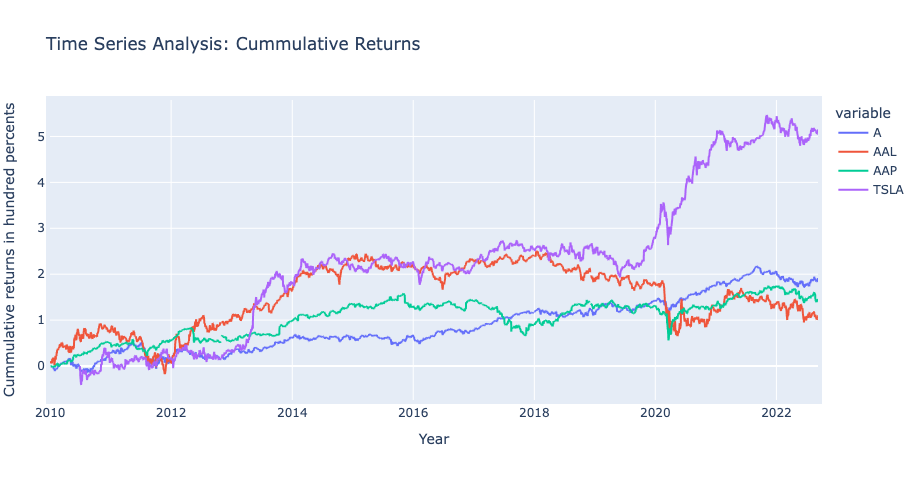

In [29]:
# plotting cummulative returns for particular stocks using Line Plot

figure3 = px.line(df_stock_cum_returns, y = ['A', 'AAL', 'AAP', 'TSLA'], 
                 title = "Time Series Analysis: Cummulative Returns")
figure3.update_layout(
    autosize=False,
    xaxis_title="Year",
    yaxis_title="Cummulative returns in hundred percents",
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
)
figure3.show()

#### Inference:
- Calculating log of returns and consequently cummulative returns narrows measurments and somewhat normalizes y-scale. 

#### Yearly Returns

In [30]:
#calculating yearly returns for all companies
df_stock_yearly_returns = np.log(df_stocks) - np.log(df_stocks.shift(252))
yearly_returns = df_stock_yearly_returns.iloc[-1]

# Merge tables
df_companies = pd.concat([df_companies.set_index('Symbol'), yearly_returns.rename('yearly_returns')], axis=1, join='inner')
df_companies.head(2)

Exchange              Shortname               Longname      Sector  \
Symbol                                                                      
AAPL        NMS             Apple Inc.             Apple Inc.  Technology   
MSFT        NMS  Microsoft Corporation  Microsoft Corporation  Technology   

                       Industry  Currentprice      Marketcap        Ebitda  \
Symbol                                                                       
AAPL       Consumer Electronics        157.37  2581875130368  1.295570e+11   
MSFT    Software—Infrastructure        264.46  1985560313856  9.798300e+10   

        Revenuegrowth       City State        Country  Fulltimeemployees  \
Symbol                                                                     
AAPL            0.019  Cupertino    CA  United States           154000.0   
MSFT            0.124    Redmond    WA  United States           221000.0   

                                      Longbusinesssummary    Weight  \
Symbol                                                                
AAPL    Apple Inc. designs, manufactures, and markets ...  0.080568   
MSFT    Microsoft Corporation develops, licenses, and ...  0.061960   

        yearly_returns  
Symbol                  
AAPL          0.021193  
MSFT         -0.116884

### Guiding Question 1: 
How S&P 500 is structured, what are the components, and how is the final price calculated? What sectors and industries are there? Who are the leaders in each one of them?

### Hierarchical data

- By what sectors and industries S&P500 is represented 

- How big are the companies within Sectors and Industries

- By what countries  is S&P500 represented? Are they all from US? 

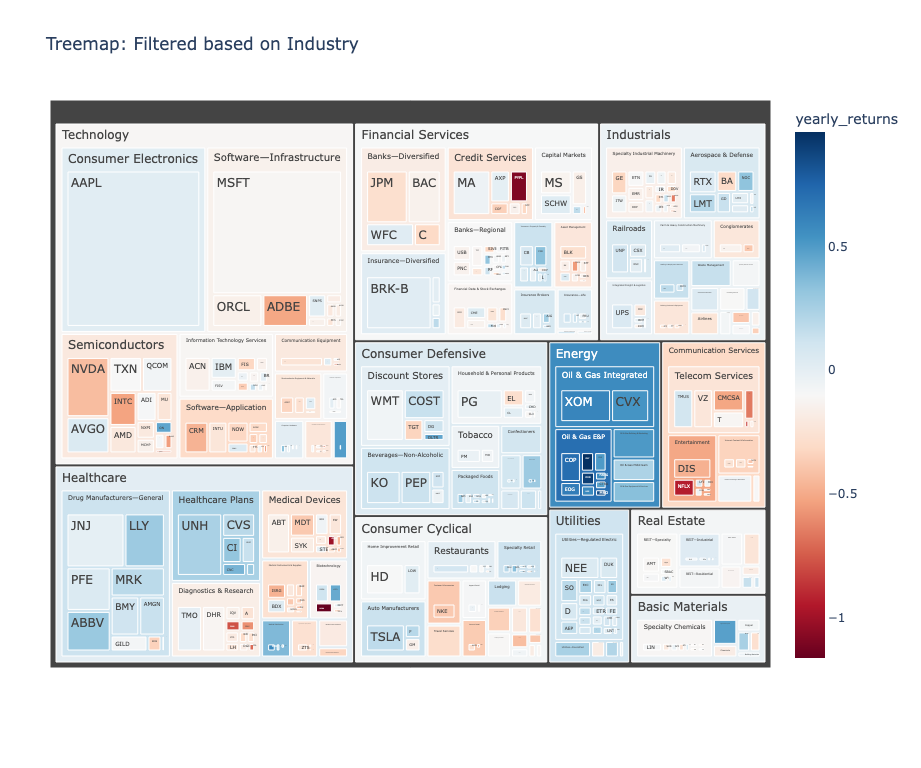

In [31]:
#plotting treemap to represent hierarchical based on Industries
fig4 = px.treemap(df_companies.reset_index(), path=['Sector', 'Industry', 'Symbol'], values='Marketcap', color='yearly_returns', color_continuous_scale='RdBu')
fig4.update_layout(
    autosize=False,
    width=1000,
    height=768,
    title='Treemap: Filtered based on Industry ',
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
)
fig4.show()

#### Inference:
- Now that we know about the returns of the S&P index over the years we can move further into our analysis process and look into which sectors to find out how each sector performs.
- We looked more deeper into this to analyse further into the best-performing company within each sector. 
- For this part of our data visualization, we are using the treemap visualization to show the structure of the S&P 500. 
- From the below treemap, three sectors stand out and make up the major chunk of the S&P index they are namely Technology, Healthcare, and Financial Services. 
- Of these three sectors tech is the major one and in that Apple in consumer electronics and Microsoft in the Software industry are the major contributors to the tech sector. 
- From the above graph, we can also infer that for the last year the Energy sector is the one with the highest returns this could be due to the energy shortages all across the world driven by significant global events which, in turn, drove up the energy prices. 
- But historically if we see the S&P 500 structure then Technology comes out on the top and has been the major part of the index for past years.

#### By Country 

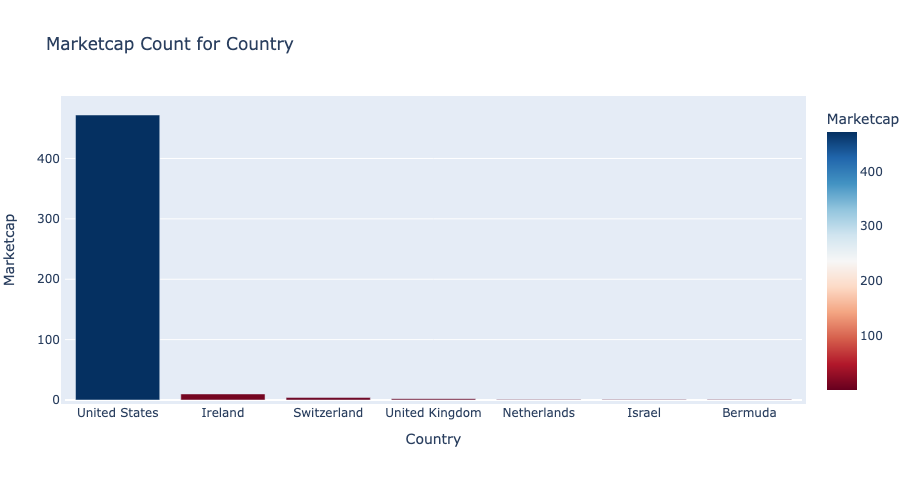

In [32]:
#plotting bar graph to represent companies count countrywise

df_country = df_companies.groupby('Country',as_index=False)['Marketcap'].count()
fig5 = px.bar(df_country, x='Country', y='Marketcap', color='Marketcap', color_continuous_scale='RdBu')
fig5.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig5.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='Marketcap Count for Country ',
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
)
fig5.show()

#### Inference:
- The above bar graph represents stocks companies count over countries. 
- From this, we can infer that around 95% stocks are from United States and then from Ireland, Switzerland, and rest. 
- The index accounts for 95% of the market value of the U.S. equities market.

### Biggest Companies

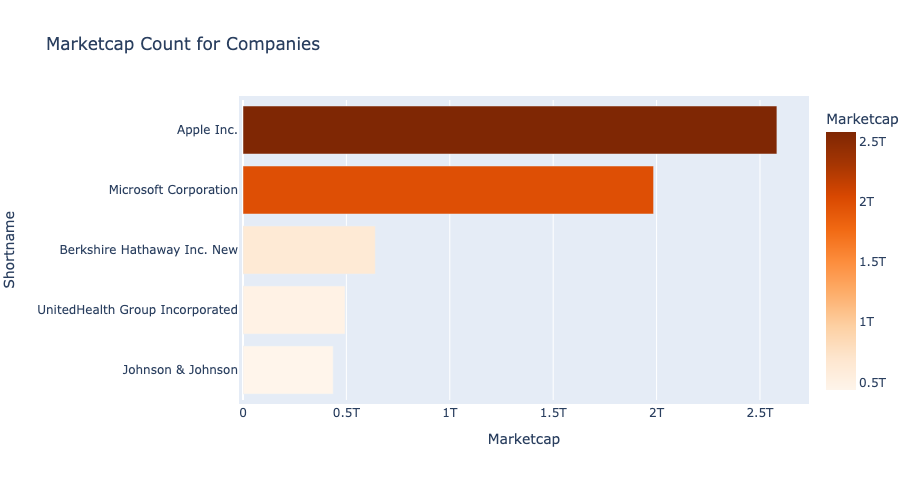

In [34]:
#plotting bar graph to represent top 5 companies based on marketcap

df_companies_sorted = df_companies.sort_values(by='Marketcap', ascending=False)
df_top = df_companies_sorted.reset_index().loc[:4, ['Shortname', 'Marketcap']]
fig6 = px.bar(df_top, x='Marketcap', y='Shortname' , color='Marketcap', color_continuous_scale='Oranges' )
fig6.update_layout(barmode='stack', yaxis={'categoryorder': 'total ascending'})
fig6.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='Marketcap Count for Companies ',
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),)
fig6.show()

In [35]:
df_companies_sorted.reset_index().loc[:4, ['Weight']].sum()

Weight    0.191522
dtype: float64

#### Inference:
- The above bar graph represents top 5 stocks companies. 
- It's ranked by market cap, the largest stocks have a big impact on both the long-term performance and daily movement of the index. 
- The 5 biggest stocks make up 20% (approx) of the index's market value. Let's repeat this again: **Top 1% (5 out of roughly 500) makes 20% of total Marketcap** of the SP500 index. 
- Two largest companies by a wide margin are _Apple_ and _Microsoft Corporation_. Both from Technology sector. 

### Guiding Question 2:
How random are markets? Are there fat tails? How the distribution of market returns compares to the normal distribution?

### Distribution of Returns

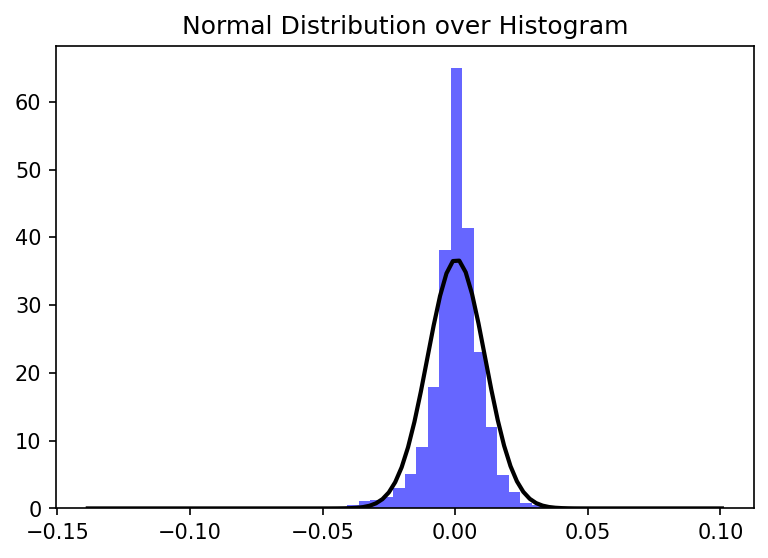

<Figure size 400x800 with 0 Axes>

In [36]:
# Fit a normal distribution to the data
# mean and standard deviation
#display(df_index)
mu, std = mu, std = df_index['returns'].mean(), df_index['returns'].std()
  
# Plot the histogram.
plt.hist(df_index['returns'], bins=50, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title('Normal Distribution over Histogram')
plt.figure(figsize=(5, 10), dpi=80)
plt.show()

### Inference
- In the above figure, we try to plot the market returns data to see whether the returns are normally distributed or not. 

- To see whether or not we can fit the mean and standard deviation over the data we plotted the density function over the stock returns distribution.  

- Also, the graph shows leptokurtic behaviour more than normal behaviour but from a statistical method.

- We have proved from the figure it is pretty evident the stock market does follow the normal distribution by using T-distribution.


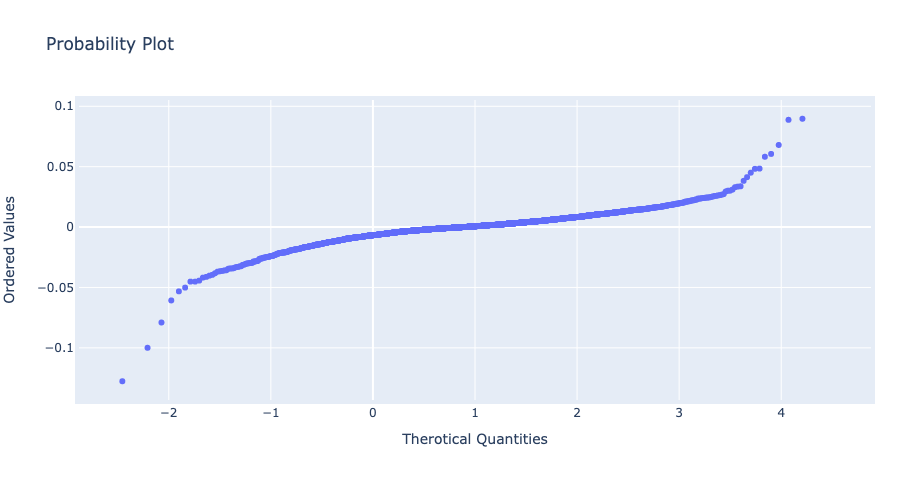

In [37]:
qq = stats.probplot(df_index['returns'], dist='norm', sparams=(1))
x = np.array([qq[0][0][0], qq[0][0][-1]])

fig7 = go.Figure()
fig7.add_scatter(x=qq[0][0], y=qq[0][1], mode='markers')
fig7.add_scatter(x=x, y=qq[1][1] + qq[1][0]*x, mode='lines')
fig7.layout.update(showlegend=False)

fig7.update_layout(
        autosize=False,
    width=1000,
    height=500,
    title="Probability Plot",
    xaxis_title="Therotical Quantities",
    yaxis_title="Ordered Values",
     margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
    )

fig7.show()

#### Inference 
- The above visualization is the qqplot of the probabilities of stock market returns and from this plot, we can reach a similar conclusion that market returns follow the normal distribution. 
- Also, we can see the data points are more on both tails i.e., fat tails. 

- But with the t-distribution method, for the degree of freedom = 3, it is proved that most of the points are on a normal line. 

- Because t-distribution has a longer normal line than usual which makes most of the data points can lie on that line.


### Guiding Question 3:
Are there any seasonal patterns in the stock market?

### Seasonal Effects¶
The S&P 500 Index is the most popular and definitely the most studied for seasonality effects. The index consists of the 500 most-capitalized stocks in the U.S. stock market, and it’s often seen as a representative of the American stock market.

The calendar effects investigated in the project:

*   Day-of-the-week
*   Day-of-the-month
*   Month-of-the-year
*   Turn-of-the-month
*   Sell-in-May-and-go-away (Halloween)
*   Week-of-the-month
*   Friday-13th









### Monthly Effects (S&P 500)

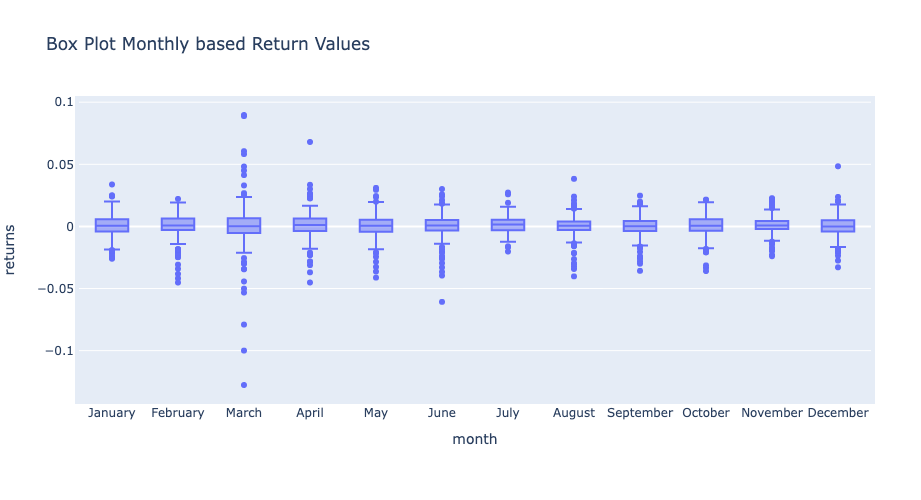

In [39]:
# Plot for Monthly Effects based on Returns
df = px.data.tips()
fig8 = px.box(df_index, y="returns", x="month")
fig8.update_layout(
          autosize=False,
    width=1000,
    height=500,
    title="Box Plot Monthly based Return Values",
     margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ticktext = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
    )
)
fig8.show()

#### Inference:
- In order to observe in which month Stocks are seasonally strong. As we can notice in above graph, Winter months are generally more quite in terms of trading and the corresponding box plot are displayed. 

- Also, there are no high magnitude outliers that can badly affect the estimations.

#### Month-of-the-year

In [40]:
#Finding best month to Invest based on Returns
sp_month_effects = df_index.groupby('month_name',as_index=False)['returns'].mean()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
          'December']
sp_month_effects['month_name'] = pd.Categorical(sp_month_effects['month_name'], categories=months, ordered=True)
sp_month_effects.sort_values('month_name', inplace=True)  # same as you have now; can use inplace=True


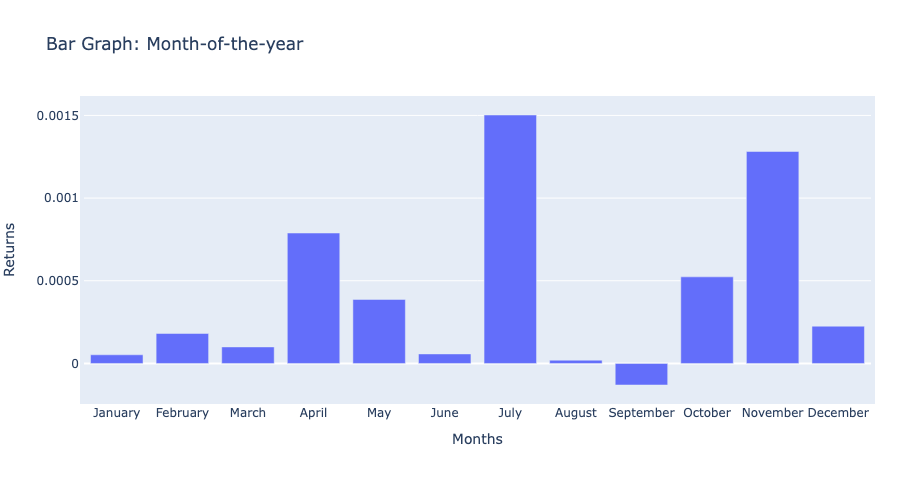

In [42]:
#plotting bargraph
fig9 = px.bar(sp_month_effects, x='month_name', y='returns')
fig9.update_layout(
        autosize=False,
    width=1000,
    height=500,
    title="Bar Graph: Month-of-the-year",
    xaxis_title="Months",
    yaxis_title="Returns",
     margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
    )
fig9.show()

#### Inference:
We can see that returns are not evenly distributed throughout the year in above bar graph. 

- Ocotober and November are good months for investors. Shopping season before Christmas and New Year. 

- "Sell in May and go away" can be true as June, August and September based on underperformance. 

- The single strongest month for stocks is July.

But we are going to examine closer if those effects are consistent as aggregated data is dangerous. 

### Examining Effects on Aggregating Returns Data


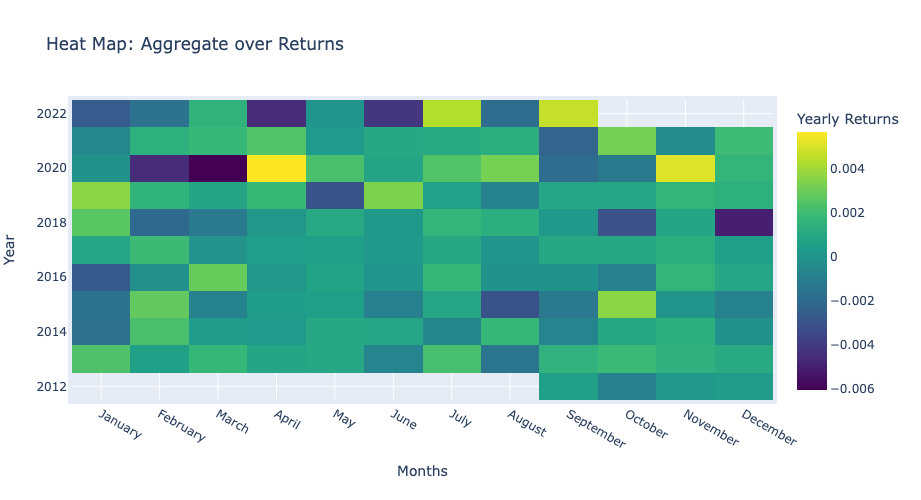

In [43]:
#Plotting Heatmap to represent aggregated returns for month and year
sp_ym_effects_temp = df_index.groupby(['year', 'month_name'], as_index = False)['returns'].mean()
#sp_ym_effects_unstack = sp_ym_effects.unstack().T.reindex(month_names).T
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
          'December']
sp_ym_effects_temp['month_name'] = pd.Categorical(sp_ym_effects_temp['month_name'], categories=months, ordered=True)
sp_ym_effects_temp.sort_values('month_name', inplace=True)


trace = go.Heatmap(
    colorbar={"title": 'Yearly Returns'},
   x = sp_ym_effects_temp['month_name'],
   y = sp_ym_effects_temp['year'],
   z = sp_ym_effects_temp['returns'],
   type = 'heatmap',
   colorscale = 'viridis'
)
data = [trace]
fig10 = go.Figure(data = data)
fig10.update_layout(
        autosize=False,
    width=1000,
    height=500,
    title="Heat Map: Aggregate over Returns",
    xaxis_title="Months",
    yaxis_title="Year",
     margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
    )

fig10.show()

#### Inference:
- Since we are exploring the seasonality effects it is a good idea to visualize how the returns change over the period of 12 months for the years 2012-2022. 

- From the visualization below it is pretty evident that September through December can be seen as calm months where the rate of returns doesn't fluctuate much and there are few outliers in this period which can be a result of various numbers of contributing factors. 

- Whereas for the months at the start of the year the market is quite active and the rate of returns fluctuates quite a lot. From this heatmap, it is evident that the month of July is the best-performing month with the highest rate of returns.

In [44]:
sp_ym_effects = df_index.groupby(['year', 'month_name'])['returns'].mean()
sp_ym_effects_unstack = sp_ym_effects.unstack().T.reindex(month_names).T

In [45]:
#finding difference in good and bad months to check the performance over the years 
good_months = ['October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']
bad_months = ['June', 'July', 'August', 'September']

temp = pd.DataFrame()
temp['bad'] = sp_ym_effects_unstack[bad_months].mean(axis=1)
temp['good'] = sp_ym_effects_unstack[good_months].mean(axis=1)
temp['diff'] = temp['good'] - temp['bad']

### Time Series Analysis

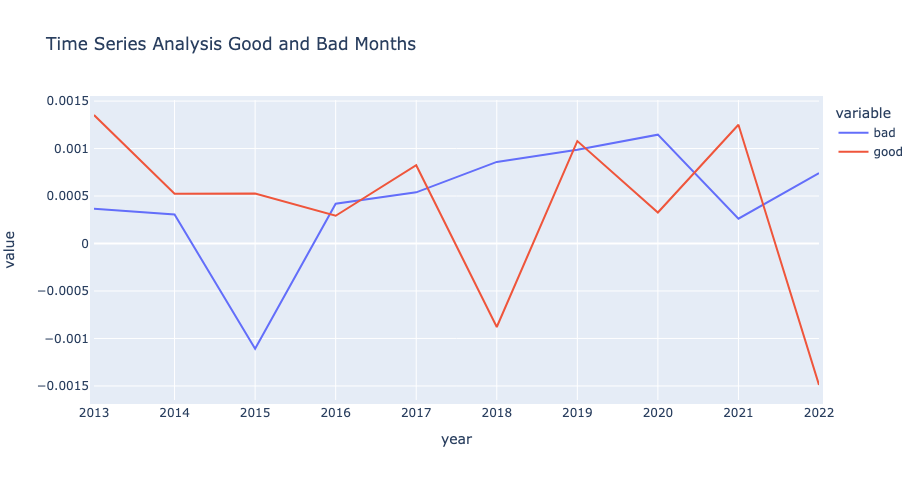

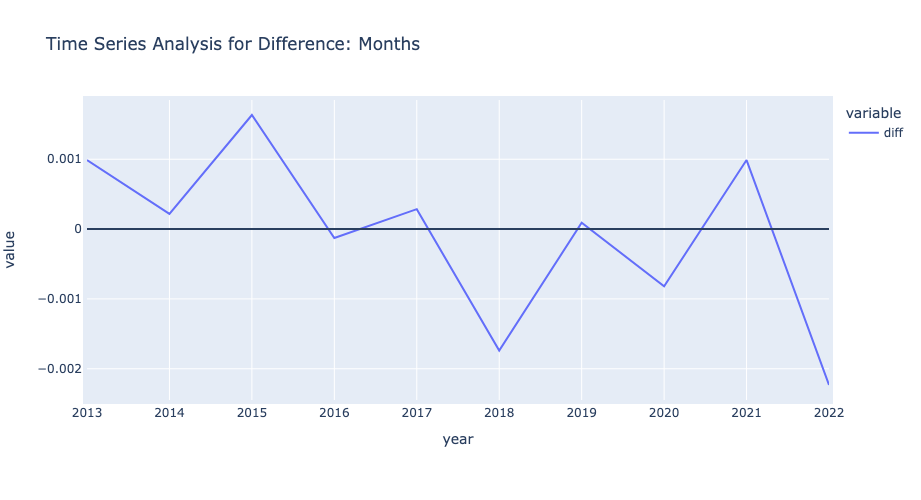

In [46]:
#plotting time series graph to visualize trends
temp = temp.loc['2013':] 
figure11 = px.line(temp, y = ['bad', 'good'], 
                 title = "Time Series Analysis Good and Bad Months")
figure12 = px.line(temp, y = ['diff'], 
                 title = "Time Series Analysis for Difference: Months")
figure12.add_hline(y=0)
figure11.update_layout(
        autosize=False,
    width=750,
    height=500,
     margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
    )
figure12.update_layout(
        autosize=False,
    width=750,
    height=500,
     margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
    )
figure11.show()
figure12.show()

#### Inference:
From this time series graph we can infer:
- First time series graph determines the difference between good and bad months.

- Second graphs determine that "Good" months performed consistently better compared to "bad" months throughout the year 2013-2022 but for except 2019 due to the pandemic situation that occurred.

- Even though the "power" of this effect deteriorated from 2015 to 2019, it has regained its power in the last years.


### Day of the Month Effects


In [47]:
sp_eom = df_index.groupby('days_to_eom',as_index=False)['returns'].mean()

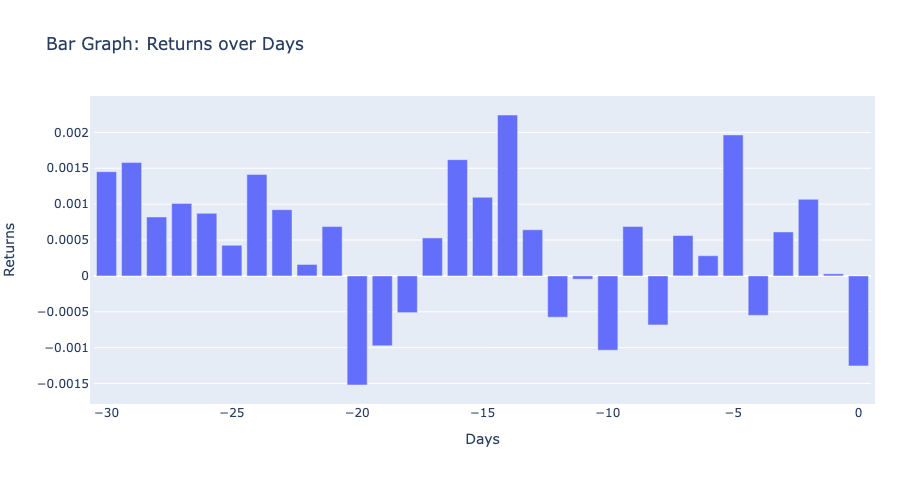

In [48]:
#plotting bar graph to show returns over days for month
fig13 = px.bar(sp_eom, x='days_to_eom', y='returns')
fig13.update_layout(
        autosize=False,
    width=750,
    height=500,
        title="Bar Graph: Returns over Days",
    xaxis_title="Days",
    yaxis_title="Returns",
     margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
    )
fig13.show()

#### Inference:
It can be seen from the above bar graph that the index tends to make strong returns around the end of the month as well as during the mid week of months. Initial days are not quite good for investors.



In [49]:
turn_of_the_month = [-30, -29]

### Week of the Month Effect

(w1, w2, w3, w4)

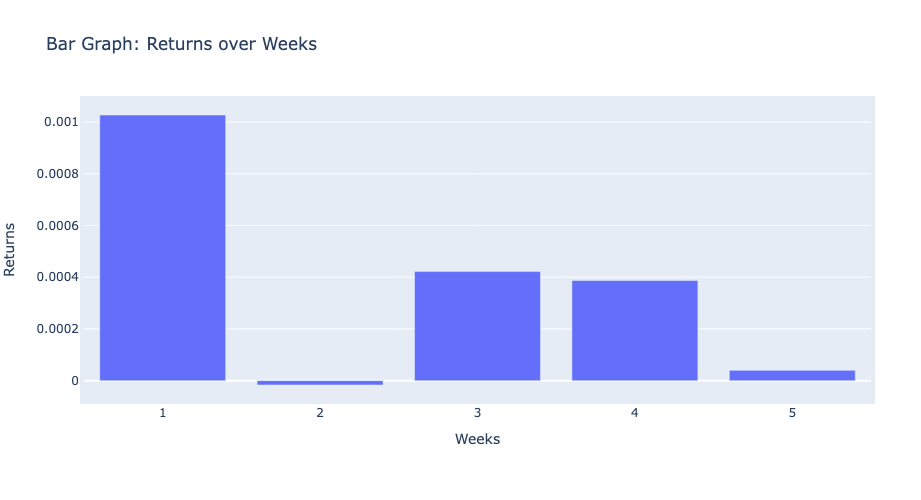

In [50]:
#plotting bar graph to show returns over weeks 
sp_wom = df_index.groupby('wom',as_index=False)['returns'].mean()
fig14 = px.bar(sp_wom, x='wom', y='returns')
fig14.update_layout(
        autosize=False,
    width=1000,
    height=500,
        title="Bar Graph: Returns over Weeks",
    xaxis_title="Weeks",
    yaxis_title="Returns",
     margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
    )
fig14.show()

#### Inference 
From the above graphs which show the returns of market index for different weeks of the month. As it shows Week 1 has higher returns comparing to rest of the weeks because of starting new financial month which we can infer.

### Day of the Week Effect

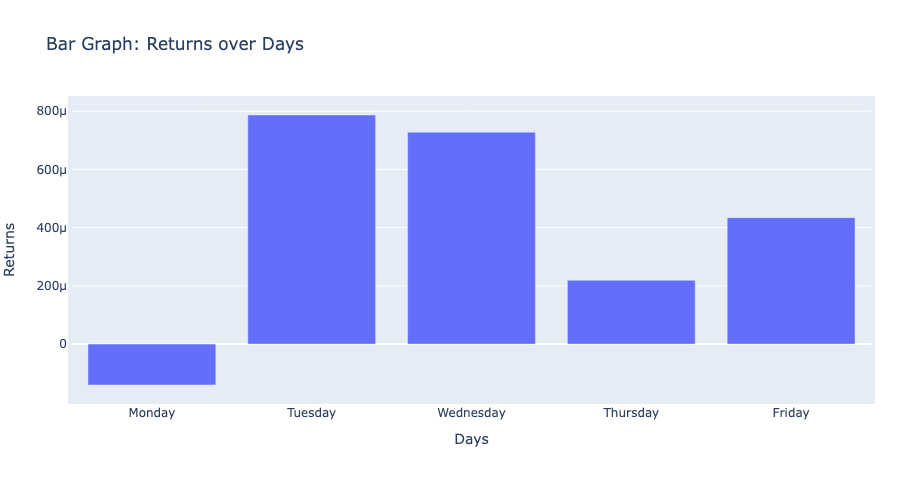

In [51]:
#plotting bar graph to show effects on returns over days of week 
#sp_dow = df_index.groupby('day_name')['returns'].mean().reindex(day_names)
#sp_dow.plot.bar()
sp_dow = df_index.groupby('day_name',as_index=False)['returns'].mean()
days_of_week = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday']
sp_dow['day_name'] = pd.Categorical(sp_dow['day_name'], categories=days_of_week, ordered=True)
sp_dow.sort_values('day_name', inplace=True)  # same as you have now; can use inplace=True
fig15 = px.bar(sp_dow, x='day_name', y='returns')
fig15.update_layout(
        autosize=False,
    width=1000,
    height=500,
        title="Bar Graph: Returns over Days",
    xaxis_title="Days",
    yaxis_title="Returns",
     margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
    )
fig15.show()

#### Inference:

-  The day-of-the-week effect suggests that returns are predictable based on the day of the week on which the trade is realized in financial markets. 
- From the above bar graph, we can infer that Friday returns are higher than Monday returns in equity markets. 
- Also, we found that the exchange rate changes on Tuesday and Wednesday are higher than on other days which affects market trading and can be seen in this graph for the same. 
- We can conclude that Tuesday and Wednesday have a higher rate of returns on comparing with the end of the trading week and the start of the week.

### Statistical Tests - Significanse of Calendar Effects

We  have  computed  a 0.95  confidence  interval  for  the mean of  the standardized  residuals of  calendar  patterns. https://ssrn.com/abstract=1958587

In [52]:
df_wom = df_index[df_index['wom']==1]
df_halloween = df_index[df_index['month_name'].isin(good_months)]
df_dom = df_index[df_index['days_to_eom'].isin(turn_of_the_month)]

In [53]:
# 
tests = {}
effects_names = ['week-of-month', 'halloween', 'day-of-month']
for i, df in enumerate([df_wom, df_halloween, df_dom]):
    boot = bootstrap(df_index, df)
    df_boot = pd.DataFrame(boot)
    lb, ub = conf_interval(boot)
    tests[effects_names[i]] = lb, ub

In [54]:
df_tests = pd.DataFrame(tests)
df_tests.index = ['lower_bound', 'upper_bound']
display(df_tests)

week-of-month  halloween  day-of-month
lower_bound      -0.000383  -0.000677     -0.000780
upper_bound       0.001556   0.000745      0.003019

## Guiding Quesstion 4:
Are there any momentum effects? Does past performance determine future ones? 

### Momentum Factor Plots

We define **momentum** as the _rate of change_ of price over some formation period.

We performed a classic rank-based factor analysis by:
- Calculating our momentum estimate
- Ranking each of our assets according to this estimate
- Looking at subsequent returns over some holding period for each rank
- So our momentum analysis is really subject to two parameters: the formation period used in the momentum estimate, and the holding period used to assess the momentum factor’s relationship with future returns.
- We looked at all combinations of 1, 3, 6, 9 and 12 month formation periods and 1, 3, 6, 9 and 12 month hold periods 


In [90]:
groups = 4
factors = [1, 3, 6, 9]
forwards = [1, 3, 6, 9]
    
def momentum_effect_func(df):
    '''
    Input:
    data frame with monthly returns as columns for the universe of stocks 
    
    Function gives two outputs:
    1) dictionary of all factors (formation period), forward (evaluated future performance period) and the resulting
    momentum effect defined as difference between group of top performers in the past and 
    the worst underperformers in the past.
    2) list of dataframes of all groups  aggregated by their future performance (mean returns)
    '''
    ix = returns_monthly.index

    final_momentum = []
    ranks = []
    for factor in factors:
        for forward in forwards:
            ix = returns_monthly.index
            myNum = (factor, forward) * (len(ix) // (factor + forward))
            prev = 0
            newList = []
            for i in myNum:
                newList.append(tuple(ix[prev:prev + i]))
                prev = prev + i

            ix_factor = newList[::2]
            ix_factor = [item for sublist in ix_factor for item in sublist]
            ix_forward = [x for x in [item for sublist in newList for item in sublist] if x not in ix_factor]
            #

            factor_df = pd.DataFrame()
            forward_df = pd.DataFrame()
            for symbol in universe:
                forward_ls = []
                factor_ls = []

                for slice in newList[::2]:
                    if len(slice) < 2:
                        start = stop = slice
                        slice_df = returns_monthly.loc[slice, symbol]
                    else:
                        start = slice[0]
                        stop = slice[1]
                        slice_df = returns_monthly.loc[start:stop, symbol].mean()
                    forward_ls.append({'mean_forward_return': slice_df})

                for slice in newList[1::2]:
                    if len(slice) < 2:
                        start = stop = slice
                        slice_df = returns_monthly.loc[slice, symbol]
                    else:
                        start = slice[0]
                        stop = slice[1]
                        slice_df = returns_monthly.loc[start:stop, symbol].mean()
                    factor_ls.append({'mean_factor_return': slice_df})

                factor_returns = pd.DataFrame(factor_ls)
                forward_returns = pd.DataFrame(forward_ls)

                # Factor df
                factor_returns = factor_returns['mean_factor_return']
                factor_returns.name = symbol
                factor_df = pd.concat([factor_df, factor_returns], axis=1)

                # Forward df
                forward_returns = forward_returns['mean_forward_return']
                forward_returns.name = symbol
                forward_df = pd.concat([forward_df, forward_returns], axis=1)

            d = []
            for ix, row in factor_df.iterrows():
                # rank factor
                bins = pd.qcut(row, groups, labels=list(range(1, groups + 1)))
                for symbol in bins.index:
                    d.append({'symbol': symbol, 'group': bins[symbol], 'factor_returns': row[symbol],
                              'forward_returns': forward_df.loc[ix, symbol]})

            result = pd.DataFrame(d)
            rank = result.groupby('group')[['factor_returns', 'forward_returns']].mean()
            # calculate difference between top and bottom groups to measure momentum effect
            momentum_effect = rank['forward_returns'].iloc[-1] - rank['forward_returns'].iloc[0] 
            # collect data
            final_momentum.append({'factor': factor, 'forward': forward, 'momentum': momentum_effect})
            ranks.append(rank)
            
    return (final_momentum, ranks)

Now, after we prepared the function that will calculate the momentum effects for us it's time to prepare the universe of stocks. Of course the population universe is S&P500 components. But let's check if the effect is conditional on companies' _size_.

We want to look classify all companies from our SP500 universe into **three equal sized** categories based on the Marketcap size as "Small", "Mid" and "Big"

In [55]:
df_companies['Size'] = pd.qcut(df_companies['Marketcap'], 3, labels=['Small', 'Mid', 'Big'])

#### Momentum effects: Small size 

In [116]:
df_companies = df_companies.reset_index()
universe = df_companies.loc[(df_companies['Size']=='Small'),'Symbol'].tolist()

Remove columns (stocks) with many NA values. 

In [118]:
momentum = df_stock_returns[universe]
nans = momentum.isna().sum() # how many NANs per symbol
remove_symbols = list(nans[nans > 12].index) # list of symbols with NANs more than 12
momentum = momentum.drop(columns=remove_symbols) # drop columns with many NANs
universe = [x for x in universe if x not in remove_symbols] # update universe
print('The universe length is {0}\n'.format(len(universe)))

returns_monthly = momentum.resample('M').mean().dropna()
returns_monthly = returns_monthly.reset_index(drop=True)

The universe length is 137



In [119]:
final_momentum, ranks = momentum_effect_func(returns_monthly)

Plot the resulting dataframes with ranked groups for all combinations of formation-holding periods

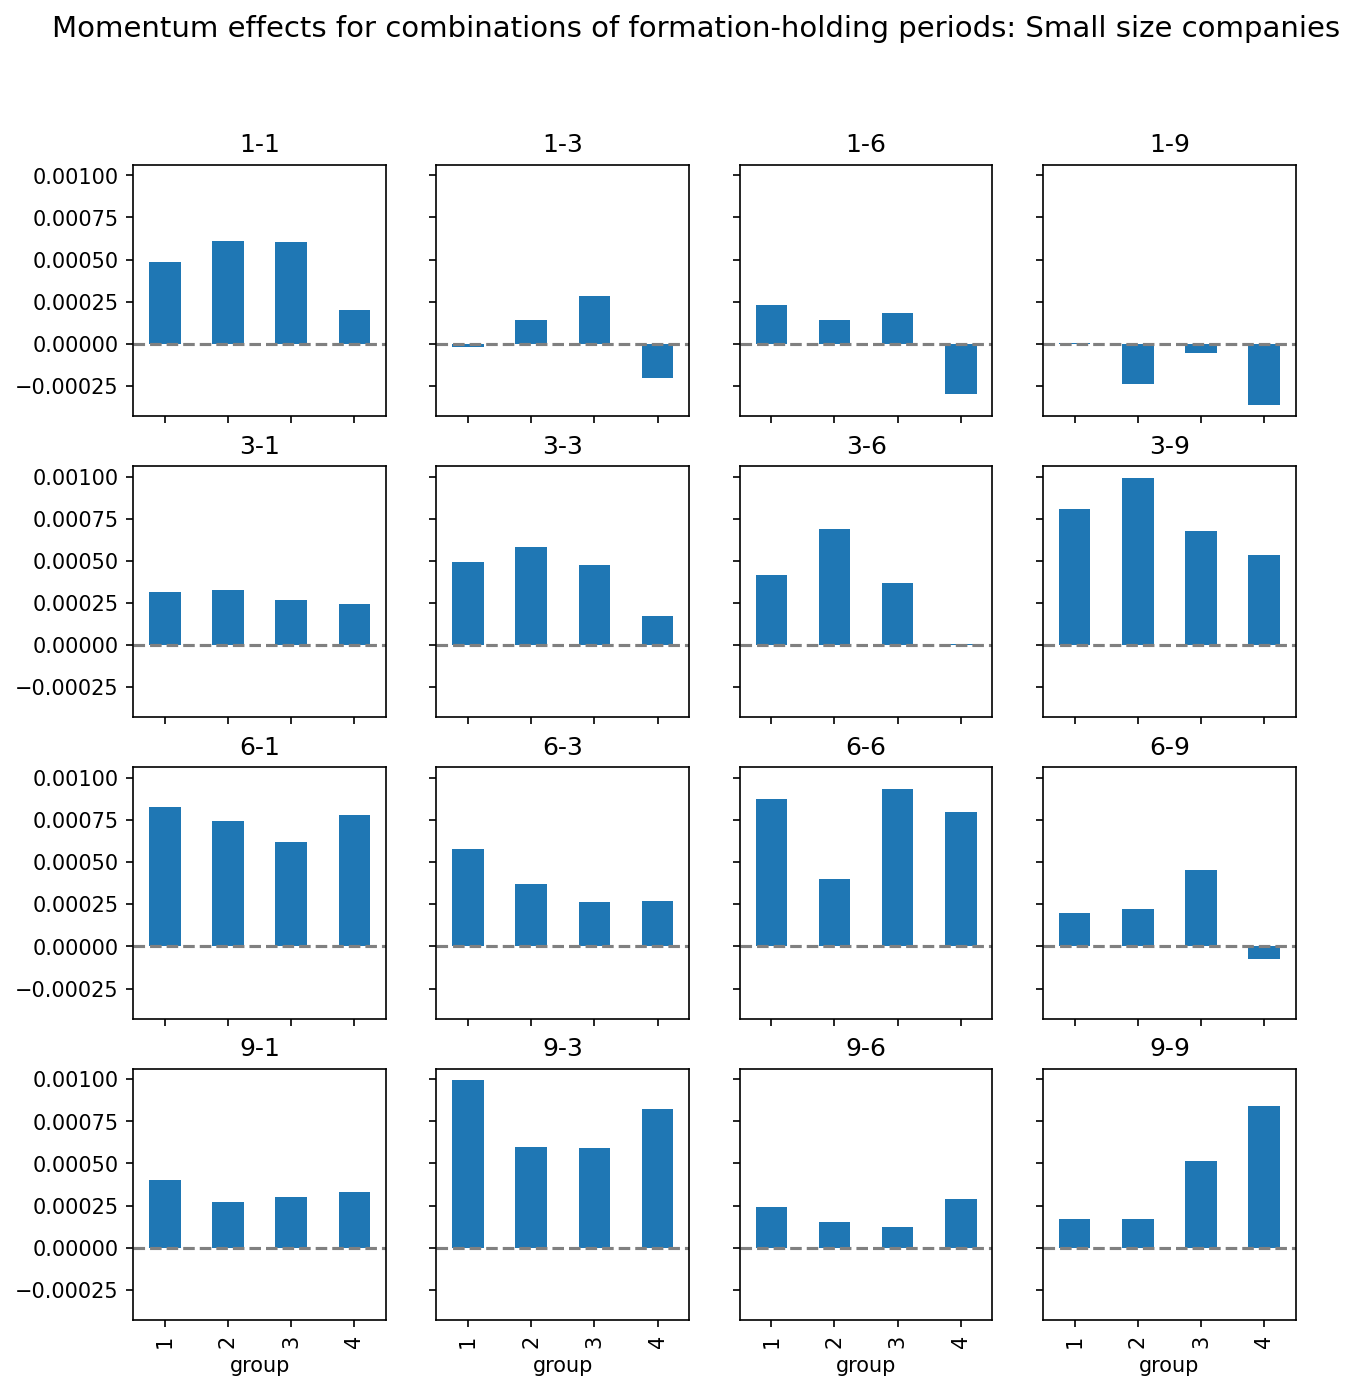

In [120]:
#define number of rows and columns for subplots
nrow=len(factors)
ncol=len(forwards)

fig, axes = plt.subplots(nrow, ncol, figsize=(10, 10), sharex=True, sharey=True)
fig.suptitle("Momentum effects for combinations of formation-holding periods: Small size companies", fontsize=14)

# subplots
count=0
for r in range(nrow):
    for c in range(ncol):
        ranks[count].reset_index().plot(ax=axes[r,c], x='group', y=['forward_returns'], kind='bar', legend=False, title='{0}-{1}'.format(factors[r], forwards[c]))
        axes[r,c].axhline(y=0, color='grey', linestyle='--')
        count+=1

Next, we tried to quantify the strength of this cross-sectional **momentum effect**. We did that by looking at the difference in mean returns between the top and bottom groups by momentum rank (again, for a combination of formation and holding periods).

Here is the heatmap that shows the difference. The formation period (in months) is on the x-axis. The holding period (in months) is on the y-axis. The _colour represents the magnitude of outperformance_ of the top-ranked asset.

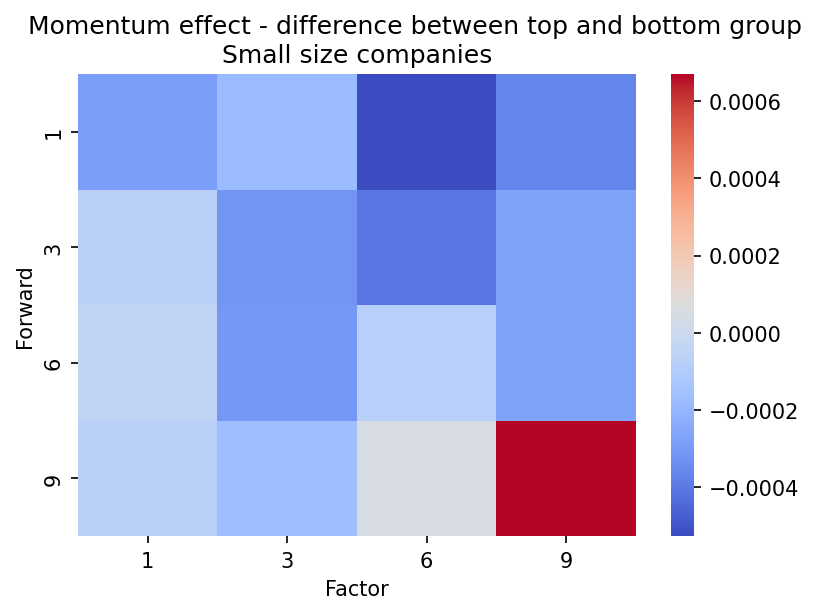

In [121]:
momentum_effects = pd.DataFrame(final_momentum)
momentum_effects_pivot = momentum_effects.pivot(index='factor', columns='forward', values='momentum')

plt.figure()
plot = sns.heatmap(momentum_effects_pivot, cmap="coolwarm")
plt.title('Small size companies')
plt.suptitle("Momentum effect - difference between top and bottom group")
plt.xlabel('Factor')
plt.ylabel('Forward')

plt.show()

#### Momentum effects: Big size 

In [124]:
df_companies = df_companies.reset_index()
universe = df_companies.loc[(df_companies['Size']=='Big'), 'Symbol'].tolist()

Remove columns (stocks) with many NA values. 

In [125]:
momentum = df_stock_returns[universe]
nans = momentum.isna().sum() # how many NANs per symbol
remove_symbols = list(nans[nans > 12].index) # list of symbols with NANs more than 12
momentum = momentum.drop(columns=remove_symbols) # drop columns with many NANs
universe = [x for x in universe if x not in remove_symbols] # update universe
print('The universe length is {0}\n'.format(len(universe)))

returns_monthly = momentum.resample('M').mean().dropna()
returns_monthly = returns_monthly.reset_index(drop=True)

The universe length is 154



In [126]:
final_momentum, ranks = momentum_effect_func(returns_monthly)

Plot

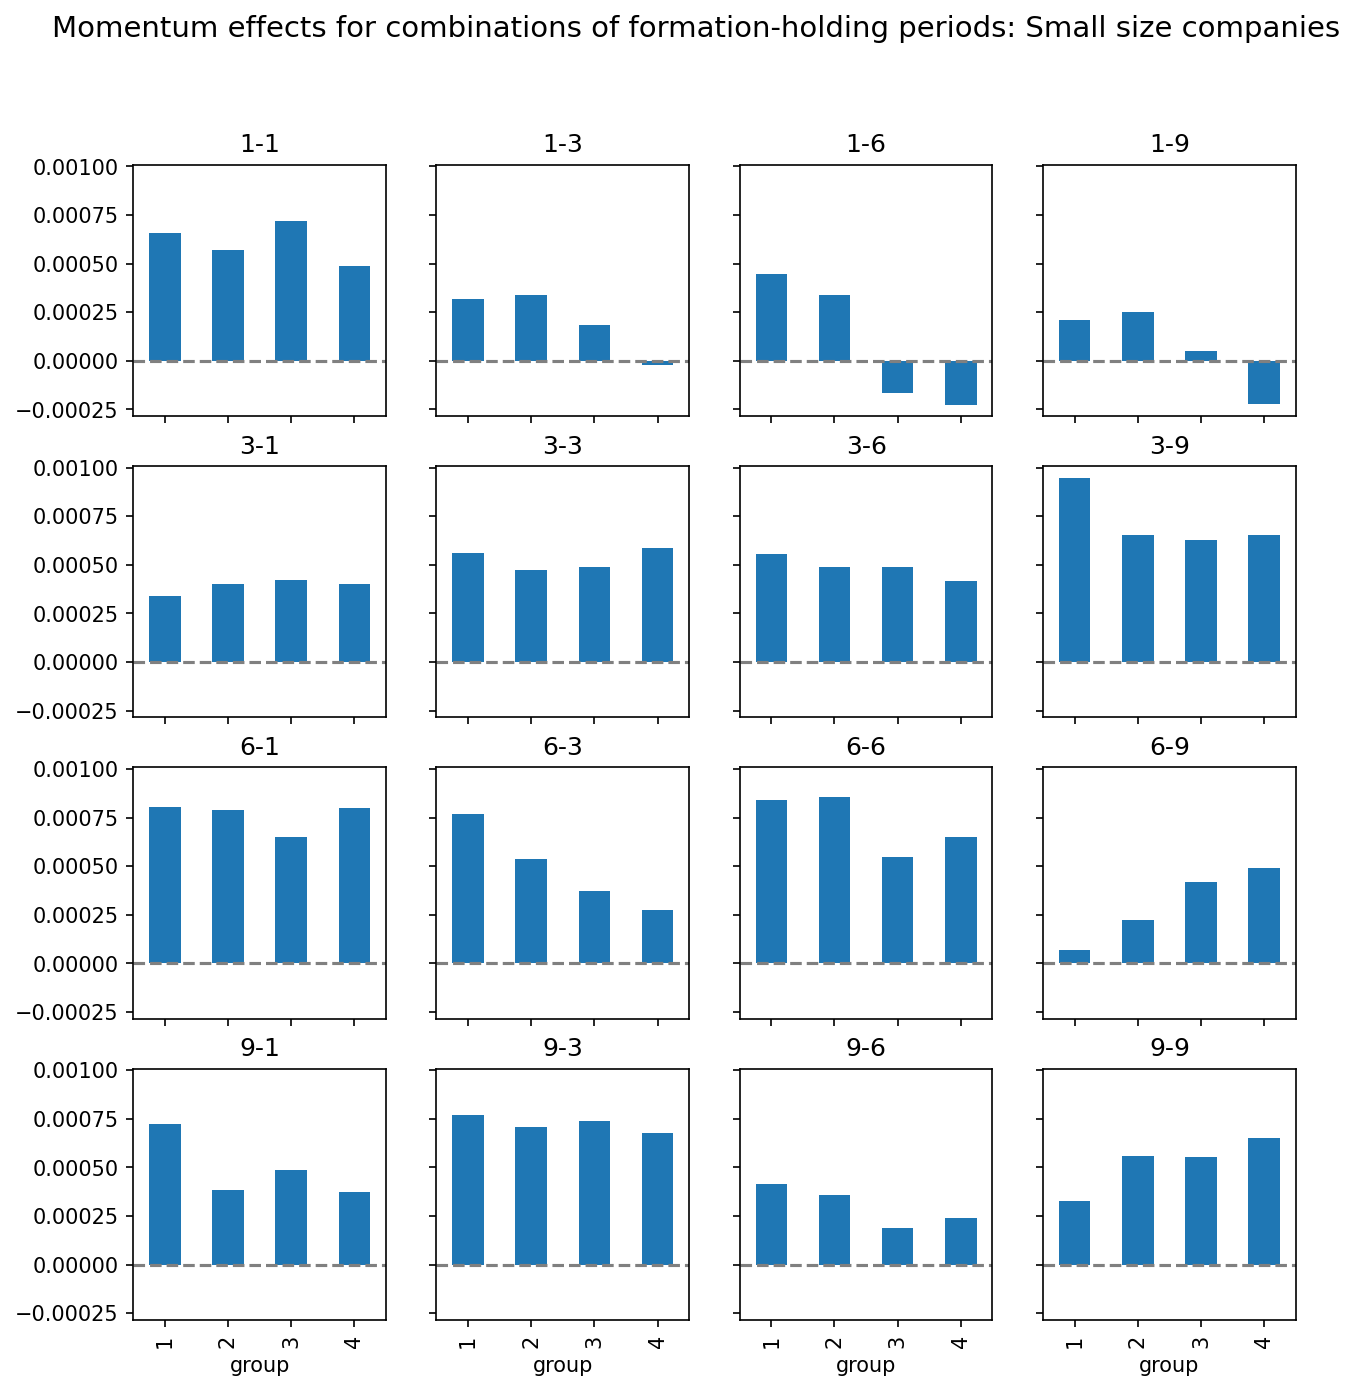

In [127]:
#define number of rows and columns for subplots
nrow=len(factors)
ncol=len(forwards)

fig, axes = plt.subplots(nrow, ncol, figsize=(10, 10), sharex=True, sharey=True)
fig.suptitle("Momentum effects for combinations of formation-holding periods: Small size companies", fontsize=14)

# subplots
count=0
for r in range(nrow):
    for c in range(ncol):
        ranks[count].reset_index().plot(ax=axes[r,c], x='group', y=['forward_returns'], kind='bar', legend=False, title='{0}-{1}'.format(factors[r], forwards[c]))
        axes[r,c].axhline(y=0, color='grey', linestyle='--')
        count+=1

Heatmap

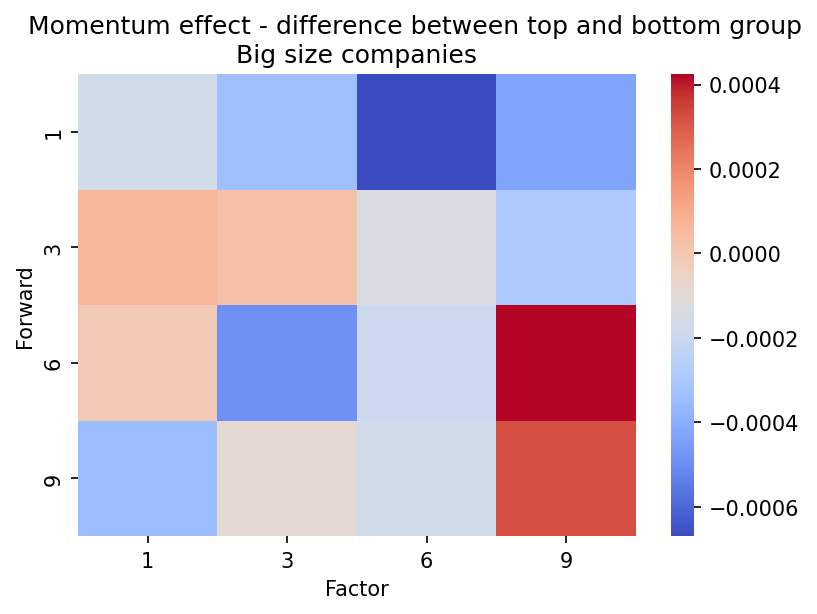

In [128]:
momentum_effects = pd.DataFrame(final_momentum)
momentum_effects_pivot = momentum_effects.pivot(index='factor', columns='forward', values='momentum')

plt.figure()
plot = sns.heatmap(momentum_effects_pivot, cmap="coolwarm")
plt.title('Big size companies')
plt.suptitle("Momentum effect - difference between top and bottom group")
plt.xlabel('Factor')
plt.ylabel('Forward')

plt.show()

**Insights for momentum analysis**:

_From the bar subplots and heatmas_

- We see that pretty much across the board, assets with higher recent momentum tend to reverse back, again on average over the whole sample of our data. 
- We can also see that the effect is greater for Big size companies for some combinations of formation and holding periods.

While looking for momnetum effects we discovered **"reverse to the mean" phenomena**. The stocks that outperformed in past tend to underperform in future. And the stocks that underperformed tend to outperform in the future. The reasonable explanation for this is that investors tend to fix profits and reinvest money into relatively "cheaper" companies as they don't want to overpay. 


#### Momentum effect: interactive charts with sliders

_Note: run in a Jupyter Notebook environment_

In [89]:
def momentum_effect_func_v2(df, factor=1, forward=1):
    '''
    Input:
    data frame with monthly returns 
    
    Function gives onw output:
    The dataframes of all groups aggregated by their future performance (mean returns)  
    '''
    ix = returns_monthly.index
 
    myNum = (factor, forward) * (len(ix) // (factor + forward))
    prev = 0
    newList = []
    for i in myNum:
        newList.append(tuple(ix[prev:prev + i]))
        prev = prev + i

    ix_factor = newList[::2]
    ix_factor = [item for sublist in ix_factor for item in sublist]
    ix_forward = [x for x in [item for sublist in newList for item in sublist] if x not in ix_factor]
    #

    factor_df = pd.DataFrame()
    forward_df = pd.DataFrame()
    for symbol in universe:
        forward_ls = []
        factor_ls = []

        for slice in newList[::2]:
            if len(slice) < 2:
                start = stop = slice
                slice_df = returns_monthly.loc[slice, symbol]
            else:
                start = slice[0]
                stop = slice[1]
                slice_df = returns_monthly.loc[start:stop, symbol].mean()
            forward_ls.append({'mean_forward_return': slice_df})

        for slice in newList[1::2]:
            if len(slice) < 2:
                start = stop = slice
                slice_df = returns_monthly.loc[slice, symbol]
            else:
                start = slice[0]
                stop = slice[1]
                slice_df = returns_monthly.loc[start:stop, symbol].mean()
            factor_ls.append({'mean_factor_return': slice_df})

        factor_returns = pd.DataFrame(factor_ls)
        forward_returns = pd.DataFrame(forward_ls)

        # Factor df
        factor_returns = factor_returns['mean_factor_return']
        factor_returns.name = symbol
        factor_df = pd.concat([factor_df, factor_returns], axis=1)

        # Forward df
        forward_returns = forward_returns['mean_forward_return']
        forward_returns.name = symbol
        forward_df = pd.concat([forward_df, forward_returns], axis=1)

    d = []
    for ix, row in factor_df.iterrows():
        # rank factor
        bins = pd.qcut(row, groups, labels=list(range(1, groups + 1)))
        for symbol in bins.index:
            d.append({'symbol': symbol, 'group': bins[symbol], 'factor_returns': row[symbol],
                      'forward_returns': forward_df.loc[ix, symbol]})

    result = pd.DataFrame(d)
    rank = result.groupby('group')['forward_returns'].mean()
                
    return rank

# Build a figure which can then be updated via a callback
bar = px.bar(momentum_effect_func(returns_monthly), 
             x=momentum_effect_func(returns_monthly, 1, 1).index, 
             y='forward_returns')

fig_wave = go.FigureWidget(data=bar) 

@interact(factor=(3,9,3), forward=(3,9,3))
def update(factor=1, forward=1):
    fig_wave.update_traces(y=momentum_effect_func(returns_monthly, factor, forward)) 

fig_wave

interactive(children=(IntSlider(value=3, description='factor', max=9, min=3, step=3), IntSlider(value=3, descr…

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>forward_retur…

### Summary of the Findings:
1. S&P 500 comprises top companies for almost every sector and in S&P technology, Healthcare and Finance make up the major portion of the s&p index. Returns for index and stocks are calculated by the formula <b>((Open Price - Close Price)/Open Price) *(100)</b>. From the Tree map that is plotted in the first part of our analysis, we can clearly identify the top company in every sector. For eg., Apple is leading the technology sector while UnitedHealth Group Incorporated comes out as a leader in the Healthcare sector.

2. The normal distribution plot over the histogram plot and qqplot for the probability of returns behaviour have analysed in the second part.
This analysis confirm that market returns maybe be random but they do follow the normal distribution and this can be used as a risk management strategy while investing in the stock market. By using the t-distribution method in Data602 to prove this for the degree of freedom = 3, and it is proved that most of the points are on a normal line. Because t-distribution has a longer normal line than usual which makes most of the data points can lie on that line.


3. We tried to visualize the returns of the S&P 500 over different time periods like daily returns over the months of the year, days of the week, week of the month, and days of the month. From this, we were able to see the seasonality’s effects in the stock market. We can conclude that month of July has a strong performance while the month of march is the most volatile additionally the last months of the year are always calm. 
As for the effects in the week, Mondays generally have a negative trend while Thursdays are the best days to sell. When we tried to look for the best-performing week in a month from our analysis it was evident that the first week of the month gave positive returns when compared to the last week of the month. Moreover when we see that the end of the month had an upward trend while index returns at the start of the month were low.

4. To summarise our findings for the momentum factor to this point, we see a weak momentum effect or absence for most formation periods. And the effect is stronger for longer holding periods.


### Possible Future Investigation:

- We can do Sector/Industry-wise analysis for the S&P 500 to see if there are any defence sectors or companies that give good returns even in the bear market.

- Should one put all their eggs in one basket? Is investing in the companies from same sectors a bad idea? We can look for how diversifying your investments in the stock market can help you lower your losses and gain reasonable returns over the years.

- We can do an analysis for checking the tendency of stock price to converge on an average value over time. This is known as mean reversion.

- Sometimes investors look for and buy cheap stocks with the hope of being rewarded later. This is because of the assumption that an inefficient market has under-priced the stock. We could investigate whether this happens in the stock markets or not?

### References:


- Tradinghours.com. 2022. List of Stock Markets | TradingHours.com. [online] Available at: <https://www.tradinghours.com/markets> [Accessed 19 September 2022].
- Kelly, B. and Pruitt, S., 2013. Market expectations in the cross‐section of present values. The Journal of Finance, 68(5), pp.1721-1756. https://doi.org/10.1111/jofi.12060
- Albuquerque, R., 2012. Skewness in stock returns: Reconciling the evidence on firm versus aggregate returns. The Review of Financial Studies, 25(5), pp.1630-1673. https://doi.org/10.1093/rfs/hhr144
- Gayaker, S., Yalcin, Y. and Berument, M.H., 2020. The day of the week effect and interest rates. Borsa Istanbul Review, 20(1), pp.55-63. https://www.sciencedirect.com/science/article/pii/S2214845019302753
- QuantPedia. n.d. Turn of the Month in Equity Indexes - QuantPedia. [online] Available at: <https://quantpedia.com/strategies/turn-of-the-month-in-equity-indexes/> [Accessed 19 October 2022].